# **Description**


For the CXPT501 final project, you will explore a large dataset that we simulated and modified based on a clinical trial (PIONEER-HF, ClinicalTrials.gov Identifier: NCT02554890).

In this study, researchers compared the effects of sacubitril/valsartan versus enalapril in stabilized acute heart failure patients with reduced ejection fraction.



##*Information included in the dataset*:

*Demographics*
*   Age
*   Sex
*   Race
*   Ethnicity

*Baseline characteristics*
*   Height (cm)
*   Weight (kg)
*   Smoking history
*   Pre-treatment NT-proBNP (pg/mL)
*   Pre-treatment BNP (pg/mL)

*Disease characteristics*
*   Prior use of ACEi/ARB
*   Left ventricular ejection fraction (%)
*   Chronic renal insufficiency

*Intervention*
*   Sacubitril/valsartan
*   Enalapril

*Efficacy outcome*
*   Week 4 NT-proBNP (pg/mL)
*   Week 8 NT-proBNP (pg/mL)

*Safety outcome*
*   Symptomatic hypotension
*   Hyperkalemia
*   Angioedema
*   Death

# **Instructions**

## Git Setup

## Git Key DO NOT RERUN

In [1]:
%%bash

#THIS IS THE KEY do not run multiple times
cd /content

ssh-keygen -t ed25519 -C '[jolea@usc.edu]' -f ~/.ssh/id_ed25519 -P ''
cat > ~/.ssh/config
Host *
  AddKeysToAgent yes
  IdentityFile ~/.ssh/id_ed25519

Generating public/private ed25519 key pair.
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:s1/RL+ThfYFPnpo3PkRPumjpOtl63VIAaz+4dSj/1Z8 [jolea@usc.edu]
The key's randomart image is:
+--[ED25519 256]--+
|                 |
|            .    |
|             o   |
|            o.o..|
|        S  ..+=B.|
|         o  o=X=B|
|        .  o.O=X*|
|         .o.B B=*|
|          +B.ooE=|
+----[SHA256]-----+


Created directory '/root/.ssh'.


In [2]:
%%bash
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519

Agent pid 748


Identity added: /root/.ssh/id_ed25519 ([jolea@usc.edu])


In [3]:
%%bash

#THIS IS THE PART WHERE YOU GO BACK TO GITHUB TO ENTER THE SSH KEY
cat ~/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIFgvYb6urPveDZXxqq3lyDkBYoYkR9FdYa62MFzLKbxZ [jolea@usc.edu]


In [4]:
%%bash
ssh -o "StrictHostKeyChecking no" -T git@github.com | exit 0

Hi jul1an-o! You've successfully authenticated, but GitHub does not provide shell access.


## Git Config

In [7]:
%%bash

#Generate the .gitignore file with its contents
cat > .gitignore
.*
.gitignore

In [8]:
%%bash

#Configure the git profile
git config --global user.email "jolea@usc.edu"
git config --global user.name "Julian Olea"

git init

#Remotely link to the existing repository and establish a local branch 'main'
git remote add origin git@github.com:jul1an-o/CXPT501_Final_Project.git
git branch -M main
git add .
git commit -m "Establish main"
git push origin main

#Generate a switch to a new branch for non-destructive editing
git checkout -b new

Initialized empty Git repository in /content/.git/
[main (root-commit) eacc102] Establish main
 6 files changed, 50070 insertions(+)
 create mode 100755 sample_data/README.md
 create mode 100755 sample_data/anscombe.json
 create mode 100644 sample_data/california_housing_test.csv
 create mode 100644 sample_data/california_housing_train.csv
 create mode 100644 sample_data/mnist_test.csv
 create mode 100644 sample_data/mnist_train_small.csv


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
To github.com:jul1an-o/CXPT501_Final_Project.git
 * [new branch]      main -> main


## Establish the File Hierarchy

In [9]:
%%bash

#Organize the directories for saving the files
rm -f -r sample_data

#Generate an empty README.md in the root directory
touch README.md

#Generate the subdirectories
mkdir -p startingData code results figures

In [170]:
%%bash

#Edit the root README.md file
cat > README.md
All relevant subfolders pertinent to the analysis.
Code: Contains the .ipynb file used to generate this analysis
Figures: Contains the two plots generated by this analysis
Results: Contains the cleaned dataset, descriptive statistics stratified by intervention, and hypothesis testing for various groups of interest
startingData: Contains the raw dataset

In [171]:
%%bash

#Edit the README.md file in the code folder
cat > /content/code/README.md
This folder contains the .ipynb file used to gnerate the analysis

In [172]:
%%bash

#Edit the README.md files in the figure folder
cat > /content/figures/README.md
This folder contains the the two plots generated by the analysis.
The first plot, plot1.pdf, is a split violin plot comparing the BMI of females and males; split by intervention
The second plot, plot2.pdf, is a Line plot of NT-proBNP concentration over time; stratified by intervention
The third plot, plot3.pdf, is a heatmap comparing the Week 8 NT-proBNP concentrations across race and intervention

In [173]:
%%bash

#Edit the README.md file in the results folder
cat > /content/results/README.md
This folder contains the cleaned dataset: cleaned_data.csv, descriptive statistics stratified by intervention: descriptive_stats.txt, and hypothesis testing for various groups of interest: hypothesis_tests_1.txt and hypothesis_tests_2.text
The descriptive_stats.txt files contains the mean, median, and sd for the dataset stratified by intervention
The hypothesis_test_1.txt contains results for the following tests:
For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels?
For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels?
For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels?
For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels?
Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)?
Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)?
Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)?
Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)?
The hypothesis_test_2.txt contains results for the following tests:
Is there a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP?
Is there a statistically significant difference between baseline and week 8 NT-proBNP?

In [14]:
%%bash

#Edit the README.md file in the startingData folder
cat > /content/startingData/README.md
This folder contains the raw dataset: raw_data.csv

## **Data import (6 points)**

**Import the Python libraries you decide to use here, e.g. Pandas (2 points)**

In [92]:
#Import all the necessary libraries for analysis

import pandas
import numpy
import scipy.stats as stats
import random
import seaborn
import matplotlib

**Download/load your individual dataset (.csv file) (2 points)**

We have prepared a dataset for each of you, labeled by name. Please download or directly import your corresponding data file from https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23. Each dataset contains data for 1 million patients, one per row.

For directly importing your file from GitHub to your Colab notebook, click on your assigned file then right-click the Download button. From there, a drop-down menu like below should appear. Select the option that copies the direct link address to your clipboard, then paste it into your notebook.

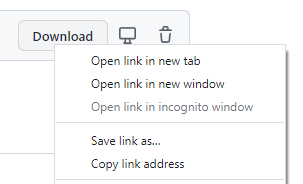

**The drop-down menu shown in Google Chrome.** If you use this web browser, click "Copy link address".

In [16]:
#Import the raw data
df = pandas.read_csv("https://raw.githubusercontent.com/Mangul-Lab-USC/CXPT-501-Fall_23/main/Julian_Olea.csv")

#Export the raw data
df.to_csv("/content/startingData/raw_data.csv")

df.head()

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,44.0,Female,Black,Not Hispanic or Latino,210.0,110.0,current,6897.231,5152.232,3848.717,1512.803,No,32.478,No,Enalapril,No,No,No
1,72.0,Male,Caucasian,Not Hispanic or Latino,189.0,77.0,never,5551.339,4146.850,3097.697,1472.107,No,28.372,No,Enalapril,No,No,No
2,35.0,Female,Caucasian,Hispanic or Latino,173.0,61.0,never,7126.750,5323.682,3976.790,2055.286,No,37.077,No,Enalapril,Yes,No,No
3,37.0,Female,Unknown,Hispanic or Latino,179.0,49.0,former,7115.145,5315.013,3970.315,1368.675,Yes,25.285,Yes,Enalapril,No,No,No
4,19.0,Female,Pacific Islander,Hispanic or Latino,194.0,87.0,never,5902.895,4409.463,3293.869,1461.170,Yes,28.062,No,Enalapril,No,No,No


**Display the dataset (2 points)**

In [17]:
df

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,44.0,Female,Black,Not Hispanic or Latino,210.0,110.0,current,6897.231,5152.232,3848.717,1512.803,No,32.478,No,Enalapril,No,No,No
1,72.0,Male,Caucasian,Not Hispanic or Latino,189.0,77.0,never,5551.339,4146.850,3097.697,1472.107,No,28.372,No,Enalapril,No,No,No
2,35.0,Female,Caucasian,Hispanic or Latino,173.0,61.0,never,7126.750,5323.682,3976.790,2055.286,No,37.077,No,Enalapril,Yes,No,No
3,37.0,Female,Unknown,Hispanic or Latino,179.0,49.0,former,7115.145,5315.013,3970.315,1368.675,Yes,25.285,Yes,Enalapril,No,No,No
4,19.0,Female,Pacific Islander,Hispanic or Latino,194.0,87.0,never,5902.895,4409.463,3293.869,1461.170,Yes,28.062,No,Enalapril,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23.0,Male,Pacific Islander,Not Hispanic or Latino,176.0,40.0,current,6364.590,3392.326,1808.110,1473.747,No,38.580,No,Sacubitril-valsartan,Yes,No,No
996,64.0,Female,Pacific Islander,Not Hispanic or Latino,161.0,60.0,never,6961.783,3710.630,1977.766,1490.805,No,32.647,No,Sacubitril-valsartan,No,No,No
997,74.0,Female,Other,Hispanic or Latino,161.0,45.0,never,5798.630,3090.670,1647.327,1337.409,No,30.121,Yes,Sacubitril-valsartan,No,No,No
998,62.0,Male,Pacific Islander,Not Hispanic or Latino,154.0,103.0,current,5569.087,2968.323,1582.116,1643.688,No,35.650,No,Sacubitril-valsartan,No,No,No


In [18]:
list(df)

['Age',
 'Sex',
 'Race',
 'Ethnicity',
 'Height (cm)',
 'Weight (kg)',
 'Smoking history',
 'Pre-treatment NT-proBNP (pg/mL)',
 'Week 4 NT-proBNP (pg/mL)',
 'Week 8 NT-proBNP (pg/mL)',
 'Pre-treatment BNP (pg/mL)',
 'Prior use of ACEi/ARB',
 'Left ventricular ejection fraction (%)',
 'Chronic renal insufficiency',
 'Group',
 'Symptomatic hypotension',
 'Hyperkalemia',
 'Death']

In [19]:
[i for i in list(df) if 'BNP' in i]

['Pre-treatment NT-proBNP (pg/mL)',
 'Week 4 NT-proBNP (pg/mL)',
 'Week 8 NT-proBNP (pg/mL)',
 'Pre-treatment BNP (pg/mL)']

## **Data cleaning (16 points)**


**Please remove all rows that have any NaN value in them (2 points)**

You can confirm that you've done this properly by using:
```
DataFrame.isnull().sum()
```

In [20]:
dfcleaned = df.dropna(how = 'any')

dfcleaned.isnull().sum()

Age                                       0
Sex                                       0
Race                                      0
Ethnicity                                 0
Height (cm)                               0
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  0
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     0
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   0
Hyperkalemia                              0
Death                                     0
dtype: int64

In [21]:
dfcleaned

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,44.0,Female,Black,Not Hispanic or Latino,210.0,110.0,current,6897.231,5152.232,3848.717,1512.803,No,32.478,No,Enalapril,No,No,No
1,72.0,Male,Caucasian,Not Hispanic or Latino,189.0,77.0,never,5551.339,4146.850,3097.697,1472.107,No,28.372,No,Enalapril,No,No,No
2,35.0,Female,Caucasian,Hispanic or Latino,173.0,61.0,never,7126.750,5323.682,3976.790,2055.286,No,37.077,No,Enalapril,Yes,No,No
3,37.0,Female,Unknown,Hispanic or Latino,179.0,49.0,former,7115.145,5315.013,3970.315,1368.675,Yes,25.285,Yes,Enalapril,No,No,No
4,19.0,Female,Pacific Islander,Hispanic or Latino,194.0,87.0,never,5902.895,4409.463,3293.869,1461.170,Yes,28.062,No,Enalapril,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23.0,Male,Pacific Islander,Not Hispanic or Latino,176.0,40.0,current,6364.590,3392.326,1808.110,1473.747,No,38.580,No,Sacubitril-valsartan,Yes,No,No
996,64.0,Female,Pacific Islander,Not Hispanic or Latino,161.0,60.0,never,6961.783,3710.630,1977.766,1490.805,No,32.647,No,Sacubitril-valsartan,No,No,No
997,74.0,Female,Other,Hispanic or Latino,161.0,45.0,never,5798.630,3090.670,1647.327,1337.409,No,30.121,Yes,Sacubitril-valsartan,No,No,No
998,62.0,Male,Pacific Islander,Not Hispanic or Latino,154.0,103.0,current,5569.087,2968.323,1582.116,1643.688,No,35.650,No,Sacubitril-valsartan,No,No,No


**Based on the study's inclusion criteria, please filter out patients who don't meet the following criteria. Store the remaining patient data in a new DataFrame. (8 points)**

*Inclusion criteria*
*   age >= 18
*   pre-treatment NT-proBNP >= 1600 pg/mL
*   pre-treatment BNP >= 400 pg/mL
*   left ventricular ejection fraction <= 40%

You can confirm how many patient entries remain by using:
```
len(DataFrame)
```



In [22]:
eligible_patients = df.loc[(df['Age'] >= 18) & (df['Pre-treatment NT-proBNP (pg/mL)'] >= 1600) & (df['Pre-treatment BNP (pg/mL)'] >= 400) & (df['Left ventricular ejection fraction (%)'] >=.40)]

eligible_patients

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,44.0,Female,Black,Not Hispanic or Latino,210.0,110.0,current,6897.231,5152.232,3848.717,1512.803,No,32.478,No,Enalapril,No,No,No
1,72.0,Male,Caucasian,Not Hispanic or Latino,189.0,77.0,never,5551.339,4146.850,3097.697,1472.107,No,28.372,No,Enalapril,No,No,No
2,35.0,Female,Caucasian,Hispanic or Latino,173.0,61.0,never,7126.750,5323.682,3976.790,2055.286,No,37.077,No,Enalapril,Yes,No,No
3,37.0,Female,Unknown,Hispanic or Latino,179.0,49.0,former,7115.145,5315.013,3970.315,1368.675,Yes,25.285,Yes,Enalapril,No,No,No
4,19.0,Female,Pacific Islander,Hispanic or Latino,194.0,87.0,never,5902.895,4409.463,3293.869,1461.170,Yes,28.062,No,Enalapril,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23.0,Male,Pacific Islander,Not Hispanic or Latino,176.0,40.0,current,6364.590,3392.326,1808.110,1473.747,No,38.580,No,Sacubitril-valsartan,Yes,No,No
996,64.0,Female,Pacific Islander,Not Hispanic or Latino,161.0,60.0,never,6961.783,3710.630,1977.766,1490.805,No,32.647,No,Sacubitril-valsartan,No,No,No
997,74.0,Female,Other,Hispanic or Latino,161.0,45.0,never,5798.630,3090.670,1647.327,1337.409,No,30.121,Yes,Sacubitril-valsartan,No,No,No
998,62.0,Male,Pacific Islander,Not Hispanic or Latino,154.0,103.0,current,5569.087,2968.323,1582.116,1643.688,No,35.650,No,Sacubitril-valsartan,No,No,No


**Add a "BMI (kg/m^2)" column to the dataframe by calculating body mass index based on weight and height provided** `BMI = weight(kg)/(height(m)**2)` **where** '`**`' **is  the exponent operator in Python. Be wary of units. (6 points)**

In [23]:
eligible_patients['BMI (kg/m^2)'] = eligible_patients['Weight (kg)']/((eligible_patients['Height (cm)']/100)**2)

<ipython-input-23-78ca7debd12d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_patients['BMI (kg/m^2)'] = eligible_patients['Weight (kg)']/((eligible_patients['Height (cm)']/100)**2)


In [24]:
eligible_patients['BMI (kg/m^2)']

0      24.943311
1      21.555947
2      20.381570
3      15.292906
4      23.116165
         ...    
995    12.913223
996    23.147255
997    17.360441
998    43.430595
999    26.592798
Name: BMI (kg/m^2), Length: 968, dtype: float64

## **Data visualization (64 points)**

###**Explore the baseline characteristics among sacubitril/valsartan and enalapril groups (14 points)**

**Categorical Data**
*   Based on your judgement, use one or more of the most appropriate plot types to visualize some aspect of the categorical data. Intervention type must be distinguished by hue.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.



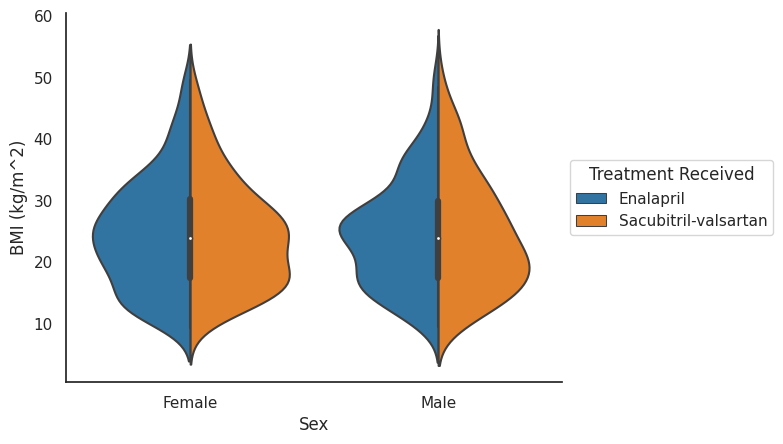

In [25]:
#Plot 1 - Distribution of BMI by Treatment Group for Men and Women
seaborn.set_style('white')
seaborn.set_context('notebook')
plot1 = seaborn.violinplot(data = eligible_patients, x = 'Sex', y = 'BMI (kg/m^2)', hue = 'Group', split = True, fill = False, inner = 'box')
plot1.set(xlabel = 'Sex', ylabel = 'BMI (kg/m^2)')
plot1.legend(loc = 'center left', bbox_to_anchor = (1, 0.5)).set_title('Treatment Received')
seaborn.despine()
matplotlib.pyplot.savefig("/content/figures/plot1.pdf", bbox_inches = 'tight')

###**Explore the efficacy of sacubitril/valsartan and enalapril at 4 weeks and 8 weeks (36 points)**
**Relational Data**
*   Follow the steps below to visualize NT-proBNP concentrations over time with a relational-type plot.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Subset the cleaned and filtered DataFrame into three smaller DataFrames containing the following columns (8 points):
*   Pre-treatment NT-proBNP & Intervention Group
*   Week 4 NT-proBNP & Intervention Group
*   Week 8 NT-proBNP & Intervention Group




In [26]:
subset1 = eligible_patients[['Pre-treatment NT-proBNP (pg/mL)', 'Group']]
subset2 = eligible_patients[['Week 4 NT-proBNP (pg/mL)', 'Group']]
subset3 = eligible_patients[['Week 8 NT-proBNP (pg/mL)', 'Group']]

2) Add a column to each of the three new DataFrames specifying each DataFrame's timepoint. The name of the column should be the same for each DataFrame (6 points).

In [27]:
subset1['Timepoint'] = 'Pre-Treatment'
subset2['Timepoint'] = 'Week 4'
subset3['Timepoint'] = 'Week 8'

<ipython-input-27-5cc69c743d11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1['Timepoint'] = 'Pre-Treatment'
<ipython-input-27-5cc69c743d11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2['Timepoint'] = 'Week 4'
<ipython-input-27-5cc69c743d11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

3) Merge all three of the new DataFrames via the most appropriate method. (6 points)

In [28]:
concat_df = pandas.concat([subset1, subset2, subset3])

In [29]:
concat_df

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,6897.231,Enalapril,Pre-Treatment,NaN,NaN
1,5551.339,Enalapril,Pre-Treatment,NaN,NaN
2,7126.750,Enalapril,Pre-Treatment,NaN,NaN
3,7115.145,Enalapril,Pre-Treatment,NaN,NaN
4,5902.895,Enalapril,Pre-Treatment,NaN,NaN
...,...,...,...,...,...
995,NaN,Sacubitril-valsartan,Week 8,NaN,1808.110
996,NaN,Sacubitril-valsartan,Week 8,NaN,1977.766
997,NaN,Sacubitril-valsartan,Week 8,NaN,1647.327
998,NaN,Sacubitril-valsartan,Week 8,NaN,1582.116


4 ) Fill in any NaNs in the merged DataFrame with the integer value 0. (2 points)

In [30]:
concat_df = concat_df.fillna(0)
concat_df

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,6897.231,Enalapril,Pre-Treatment,0.0,0.000
1,5551.339,Enalapril,Pre-Treatment,0.0,0.000
2,7126.750,Enalapril,Pre-Treatment,0.0,0.000
3,7115.145,Enalapril,Pre-Treatment,0.0,0.000
4,5902.895,Enalapril,Pre-Treatment,0.0,0.000
...,...,...,...,...,...
995,0.000,Sacubitril-valsartan,Week 8,0.0,1808.110
996,0.000,Sacubitril-valsartan,Week 8,0.0,1977.766
997,0.000,Sacubitril-valsartan,Week 8,0.0,1647.327
998,0.000,Sacubitril-valsartan,Week 8,0.0,1582.116


5) Combine all the columns containing NT-proBNP concentration data into a new, single column. (6 points)

In [31]:
concat_df['Merged NT-proBNP'] = concat_df['Pre-treatment NT-proBNP (pg/mL)'] + concat_df['Week 4 NT-proBNP (pg/mL)'] + concat_df['Week 8 NT-proBNP (pg/mL)']
concat_df

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Merged NT-proBNP
0,6897.231,Enalapril,Pre-Treatment,0.0,0.000,6897.231
1,5551.339,Enalapril,Pre-Treatment,0.0,0.000,5551.339
2,7126.750,Enalapril,Pre-Treatment,0.0,0.000,7126.750
3,7115.145,Enalapril,Pre-Treatment,0.0,0.000,7115.145
4,5902.895,Enalapril,Pre-Treatment,0.0,0.000,5902.895
...,...,...,...,...,...,...
995,0.000,Sacubitril-valsartan,Week 8,0.0,1808.110,1808.110
996,0.000,Sacubitril-valsartan,Week 8,0.0,1977.766,1977.766
997,0.000,Sacubitril-valsartan,Week 8,0.0,1647.327,1647.327
998,0.000,Sacubitril-valsartan,Week 8,0.0,1582.116,1582.116


In [32]:
concat_df['Merged NT-proBNP'].describe()

count    2904.000000
mean     4243.516531
std      1685.745321
min      1485.328000
25%      3029.001250
50%      4060.718000
75%      5599.527250
max      8695.253000
Name: Merged NT-proBNP, dtype: float64

In [33]:
#Please note that steps 1-5 can be reduced to one step using this
temp = eligible_patients[['Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)', 'Group']].copy()

temp = temp.rename(columns = {'Pre-treatment NT-proBNP (pg/mL)': 'Pre-treatment', 'Week 4 NT-proBNP (pg/mL)': 'Week 4', 'Week 8 NT-proBNP (pg/mL)' : 'Week 8'})

melt_df = pandas.melt(temp, id_vars = 'Group', value_vars = list(temp.iloc[:,0:3]), var_name = 'Timepoint', value_name = 'Merged NT-proBNP')

melt_df['Merged NT-proBNP'].describe()

count    2904.000000
mean     4243.516531
std      1685.745321
min      1485.328000
25%      3029.001250
50%      4060.718000
75%      5599.527250
max      8695.253000
Name: Merged NT-proBNP, dtype: float64

6) Use a line plot to graph NT-proBNP concentration over time, with Intervention Group seperated by hue. (8 points)

The arguements you pass to lineplot() should include:
*   `ci='sd'`
*   `err_style='bars'`
*   `marker="o"`



<ipython-input-34-a6441ae5a7ec>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  plot2 = seaborn.lineplot(data = concat_df, x = 'Timepoint', y = 'Merged NT-proBNP', hue = 'Group', ci = 'sd', err_style = 'bars', marker = 'o')


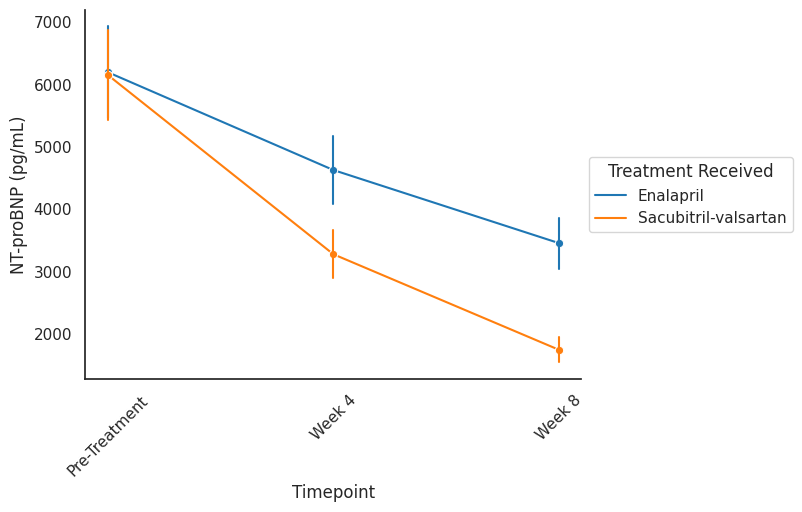

In [34]:
#Plot 2 - NT-proBNP Over Time
seaborn.set_style('white')
seaborn.set_context('notebook')
plot2 = seaborn.lineplot(data = concat_df, x = 'Timepoint', y = 'Merged NT-proBNP', hue = 'Group', ci = 'sd', err_style = 'bars', marker = 'o')
plot2.set(xlabel = 'Timepoint', ylabel = 'NT-proBNP (pg/mL)')
plot2.tick_params(axis='x', rotation = 45)
plot2.legend(loc = 'center left', bbox_to_anchor = (1, 0.5)).set_title('Treatment Received')
seaborn.despine()
matplotlib.pyplot.savefig("/content/figures/plot2.pdf", bbox_inches = 'tight')

###**Explore the efficacy of sacubitril/valsartan and enalapril for a  demographic (8 points)**

**Matrix Data**
*   Follow the steps below to produce a heatmap to visualize NT-proBNP concentration at Week 8 for some demographic of your choice. Intervention type must be an axis of the matrix data.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Contexts

* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Convert your categorical data into matrix data. (4 points)

In [35]:
eligible_patients_matrix = eligible_patients[['Week 8 NT-proBNP (pg/mL)', 'Group', 'Race']].groupby(['Group', 'Race']).mean()
eligible_patients_matrix = eligible_patients_matrix.reset_index()
eligible_patients_matrix = eligible_patients_matrix.pivot('Group', 'Race', 'Week 8 NT-proBNP (pg/mL)')

eligible_patients_matrix

<ipython-input-35-bd43ad2e53ab>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  eligible_patients_matrix = eligible_patients_matrix.pivot('Group', 'Race', 'Week 8 NT-proBNP (pg/mL)')


Race,Asian,Black,Caucasian,Native American,Other,Pacific Islander,Unknown
Group,,,,,,,
Enalapril,3465.784768,3522.746765,3448.736362,3443.287041,3446.677636,3398.060631,3459.725442
Sacubitril-valsartan,1734.329500,1780.471425,1730.032263,1735.626462,1744.614055,1757.229164,1742.180278


2) Plot a heatmap from your matrix data. It is okay if it does not look very complex. (4 points)

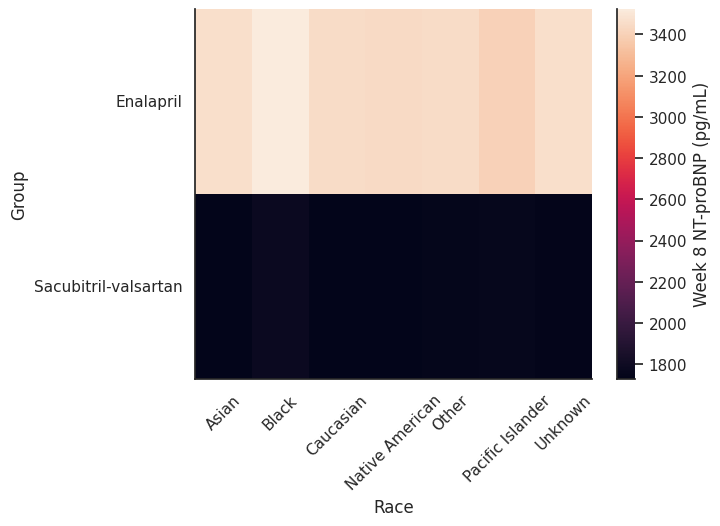

In [28]:
#Plot 3 Heatmap of Ethnicity
seaborn.set_style('white')
seaborn.set_context('notebook')
plot3 = seaborn.heatmap(eligible_patients_matrix, cbar_kws={'label': 'Week 8 NT-proBNP (pg/mL)'})
plot3.tick_params(axis='x', rotation = 45)
plot3.tick_params(axis='y', rotation = 0)
#plot3.legend(loc = 'center left', bbox_to_anchor = (1, 5.5)).set_title('Week 8 NT-proBNP (pg/mL)')
seaborn.despine()
matplotlib.pyplot.savefig("/content/figures/plot2.pdf", bbox_inches = 'tight')

## **Statistical analysis (20 points)**

**Explore the safety of sacubitril/valsartan and enalapril in this stabilized acute heart failure patient population**

Please provide the following statistical measures for various characteristics, including BMI, and group the results by the intervention type (sacubitril/valsartan and enalapril):

**For Sacubitril/Valsartan Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.

**For Enalapril Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.  (4 points)

In [165]:
statslist = list()
for i in ['Enalapril', 'Sacubitril-valsartan']:
  temp = eligible_patients.loc[eligible_patients['Group'] == i]
  mean = temp.mean()
  median = temp.median()
  std = temp.std()

  statslist.append(pandas.DataFrame({'mean' : mean, 'median' : median, 'std' : std, 'group' : i}))

descriptive_stats = pandas.concat(statslist).pivot(columns = 'group', values = ['mean', 'median', 'std'])

descriptive_stats.to_csv('/content/results/descriptive_stats.txt', sep='\t', index=False)

descriptive_stats

<ipython-input-165-c6c0501adedb>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = temp.mean()
<ipython-input-165-c6c0501adedb>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = temp.median()
<ipython-input-165-c6c0501adedb>:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = temp.std(

mean                       \
group                                     Enalapril Sacubitril-valsartan   
Age                                       50.207819            49.022822   
BMI (kg/m^2)                              24.534828            24.463005   
Height (cm)                              183.604938           182.850622   
Left ventricular ejection fraction (%)    32.364228            32.266392   
Pre-treatment BNP (pg/mL)               1533.484566          1548.843577   
Pre-treatment NT-proBNP (pg/mL)         6193.428117          6148.497446   
Week 4 NT-proBNP (pg/mL)                4626.490794          3277.149156   
Week 8 NT-proBNP (pg/mL)                3455.988621          1746.720502   
Weight (kg)                               80.401235            79.334719   

                                             median                       \
group                                     Enalapril Sacubitril-valsartan   
Age                                       51.000000              50.0000   
BMI (kg/m^2)                              24.302487              23.2998   
Height (cm)                              184.500000             183.0000   
Left ventricular ejection fraction (%)    31.020500              31.3705   
Pre-treatment BNP (pg/mL)               1484.676500            1516.2715   
Pre-treatment NT-proBNP (pg/mL)         6037.857000            5993.7555   
Week 4 NT-proBNP (pg/mL)                4510.279000            3194.6720   
Week 8 NT-proBNP (pg/mL)                3369.178500            1702.7600   
Weight (kg)                               80.000000              81.0000   

                                               std                       
group                                    Enalapril Sacubitril-valsartan  
Age                                      18.218604            17.513568  
BMI (kg/m^2)                              8.771946             9.036747  
Height (cm)                              17.776281            17.528904  
Left ventricular ejection fraction (%)    5.404897             5.134304  
Pre-treatment BNP (pg/mL)               187.788662           176.056581  
Pre-treatment NT-proBNP (pg/mL)         733.837565           716.177278  
Week 4 NT-proBNP (pg/mL)                548.176661           381.722468  
Week 8 NT-proBNP (pg/mL)                409.487944           203.458085  
Weight (kg)                              23.723439            23.314566

What statistical test should be employed to analyze the effectiveness of the new heart failure medication formulations developed by two pharmaceutical companies, sacubitril and enalapril, with respect to their claims of reducing NT-proBNP levels? The claims state that sacubitril reduces NT-proBNP levels by an average of 3000 within 4 weeks and 2000 within 8 weeks, while enalapril reduces NT-proBNP levels by an average of 2500 within 4 weeks and 1500 within 8 weeks. A clinical trial was conducted using samples from both companies, and the objective is to determine which formulation is more effective.

Clearly state your hypotheses for the combinations of analyses and do the significance test accordingly:

1. For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

2. For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

3. For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

4. For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

5. Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

6. Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

7. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

8. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)
   

In [37]:
#Generate a function for all the hypothesis testing

def Hypothesis_testing_function (input1, input2):
  #Function to determine the appropriate statistical test
  #When comparing timepoints, input1 should be the earlier timepoint while inpu2 should be the later timepoint
  #If nrows for input1 = input2, then we will use a paired t-test
  #If nrows for input1 ≠ input2, then we will use an independent t-test
  ##Variance will be assessed to determine whether we should use a regular (equal variance) or Welch (unequal variance) Independent T-Test
  ###For the Levene Normality test, if p <.05 variance is not equal and we use the Welch Independent T-Test


  print(f'We are interested in comparing these two groups: {input1.name} and {input2.name}\n\n')

  #Paired T-Test
  if len(input1) == len(input2):
    temp = stats.ttest_rel(input2, input1)
    print('We will use a Paired T-Test because the observations being compared come from the same sample\n')
    if temp[1] < .05:
      print('There is a significant difference between Group 1: ', input1.name, ' and Group 2: ', input2.name, 'with a p-value of: ', temp[1], '\n')
      print('----------------------------------------------------------------------------------------------------------------------------------\n')
    else:
      print('There is no significant difference between Group 1: ', input1.name, ' and Group 2: ', input2.name, 'with a p-value of: ', temp[1], '\n')
      print('----------------------------------------------------------------------------------------------------------------------------------\n')

  else:
    print('We will use an Independent T-Test because the observations being compared come from different groups; first we must assess the variance\n')
    levenetemp = stats.levene(input1, input2)

    if levenetemp[1] < .05:
      print('The Levene test has a p-value of: ', levenetemp[1], ' and is singificant, therefore we assume the data does not have equal variance and proceed with the Welch Independent T-Test\n')
      #print("This data does not have equal variance so we will use the Welch Indpendent T-Test")
      welchtemp = stats.ttest_ind(input1, input2, equal_var = False)
      #print(welchtemp)
      if welchtemp[1] < .05:
        print('There is a significant difference between Group 1: ', input1.name, ' and Group 2: ', input2.name, 'with a p-value of: ', welchtemp[1], '\n')
        print('----------------------------------------------------------------------------------------------------------------------------------\n')
      else:
        print('There is no significant difference between Group 1: ', input1.name, ' and Group 2: ', input2.name, 'with a p-value of: ', welchtemp[1], '\n')
        print('----------------------------------------------------------------------------------------------------------------------------------\n')

    elif levenetemp[1] > .05:
      print('The Levene test has a p-value of: ', levenetemp[1], ' and is not significant, therefore we assume the data has equal variance and proceed with the standard Independent T-Test\n')
      standardttemp = stats.ttest_ind(input1, input2, equal_var = True)
      #print(standardttemp)
      if standardttemp[1] < .05:
        print('There is a significant difference between Group 1: ', input1.name, ' and Group 2: ', input2.name, 'with a p-value of: ', standardttemp[1], '\n')
        print('----------------------------------------------------------------------------------------------------------------------------------\n')
      else:
        print('There is no significant difference between Group 1: ', input1.name, ' and Group 2: ', input2.name, 'with a p-value of: ', standardttemp[1], '\n')
        print('----------------------------------------------------------------------------------------------------------------------------------\n')

In [38]:
#Generate a dictionary to iterate through 8 sets of comparisons
testlist = {}

#1
testlist['1'] = [eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Pre-treatment NT-proBNP (pg/mL)']]

#2
testlist['2'] = [eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Pre-treatment NT-proBNP (pg/mL)']]

#3
testlist['3'] = [eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Pre-treatment NT-proBNP (pg/mL)']]

#4
testlist['4'] = [eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Pre-treatment NT-proBNP (pg/mL)']]

#5
testlist['5'] = [eligible_patients.loc[eligible_patients['Group'] == 'Enalapril']['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[eligible_patients['Group'] == 'Sacubitril-valsartan']['Week 4 NT-proBNP (pg/mL)']]

#6
testlist['6'] = [eligible_patients.loc[eligible_patients['Group'] == 'Enalapril']['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[eligible_patients['Group'] == 'Sacubitril-valsartan']['Week 8 NT-proBNP (pg/mL)']]

#7
testlist['7'] = [eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan') & (eligible_patients['Age'] >= 60)]['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril') & (eligible_patients['Age'] >= 60)]['Week 4 NT-proBNP (pg/mL)']]

#8
testlist['8']= [eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan') & (eligible_patients['Age'] >= 60)]['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril') & (eligible_patients['Age'] >= 60)]['Week 8 NT-proBNP (pg/mL)']]

#Loop through dictionary using the Hypothesis Test Function
for i in testlist.keys():
  print(f'Test #{i}')
  Hypothesis_testing_function(testlist[i][0], testlist[i][1])
  print('\n')

Test #1
We are interested in comparing these two groups: Week 4 NT-proBNP (pg/mL) and Pre-treatment NT-proBNP (pg/mL)


We will use a Paired T-Test because the observations being compared come from the same sample

There is a significant difference between Group 1:  Week 4 NT-proBNP (pg/mL)  and Group 2:  Pre-treatment NT-proBNP (pg/mL) with a p-value of:  0.0 

----------------------------------------------------------------------------------------------------------------------------------



Test #2
We are interested in comparing these two groups: Week 8 NT-proBNP (pg/mL) and Pre-treatment NT-proBNP (pg/mL)


We will use a Paired T-Test because the observations being compared come from the same sample

There is a significant difference between Group 1:  Week 8 NT-proBNP (pg/mL)  and Group 2:  Pre-treatment NT-proBNP (pg/mL) with a p-value of:  0.0 

----------------------------------------------------------------------------------------------------------------------------------



Te

Is there a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups? (2 points)

In [55]:
#Use the Hypothesis Test Function to iterate through two sets of comparisons
testlist2 = {}

#1
testlist2['1: Paired T Test for Baseline vs. Week 4 NT-proBNP'] = [eligible_patients['Week 4 NT-proBNP (pg/mL)'], eligible_patients['Pre-treatment NT-proBNP (pg/mL)']]


#2
testlist2['2: Paired T Test for Baseline vs. Week 8 NT-proBNP'] = [eligible_patients['Week 8 NT-proBNP (pg/mL)'], eligible_patients['Pre-treatment NT-proBNP (pg/mL)']]

for i in testlist2.keys():
  print(f'Test #{i}')
  Hypothesis_testing_function(testlist2[i][0], testlist2[i][1])
  print('\n')

print(
    'For the Paired T-Test between the Baseline vs. Week 4 NT-proBNP, our hypotheses are as follows:\n'
    'H0: The mean NT-proBNP at Baseline is equal to the mean NT-proBNP at Week 4 \n'
    'H1: The mean NT-proBNP at Baseline is not equal to the mean NT-proBNP at Week 4 \n'
    'Since the p-value is < .05, we fail to reject the null hypothesis that the mean NT-proBNP at Baseline is equal to the mean NT-proBNP at Week 4.\n'
    '\n'
    'For the Paired T-Test between the Baseline vs. Week 8 NT-proBNP, our hypotheses are as follows:\n'
    'H0: The mean NT-proBNP at Baseline is equal to the mean NT-proBNP at Week 8\n'
    'H1: The mean NT-proBNP at Baseline is not equal to the mean NT-proBNP at Week 8\n'
    'Since the p-value is < .05, we fail to reject the null hypothesis that the mean NT-proBNP at Baseline is equal to the mean NT-proBNP at Week 8.'
    )

Test #1: Paired T Test for Baseline vs. Week 4 NT-proBNP
We are interested in comparing these two groups: Week 4 NT-proBNP (pg/mL) and Pre-treatment NT-proBNP (pg/mL)


We will use a Paired T-Test because the observations being compared come from the same sample

There is a significant difference between Group 1:  Week 4 NT-proBNP (pg/mL)  and Group 2:  Pre-treatment NT-proBNP (pg/mL) with a p-value of:  0.0 

----------------------------------------------------------------------------------------------------------------------------------



Test #2: Paired T Test for Baseline vs. Week 8 NT-proBNP
We are interested in comparing these two groups: Week 8 NT-proBNP (pg/mL) and Pre-treatment NT-proBNP (pg/mL)


We will use a Paired T-Test because the observations being compared come from the same sample

There is a significant difference between Group 1:  Week 8 NT-proBNP (pg/mL)  and Group 2:  Pre-treatment NT-proBNP (pg/mL) with a p-value of:  0.0 

--------------------------------------

**Write your answer here**

For the Paired T-Test between the Baseline vs. Week 4 NT-proBNP, our hypotheses are as follows:

H0: The mean NT-proBNP at Baseline is equal to the mean  NT-proBNP at Week 4

H1: The mean NT-proBNP at Baseline is not equal to the mean  NT-proBNP at Week 4

Since the p-value is < .05, we fail to reject the null hypothesis that the mean NT-proBNP at Baseline is equal to the mean  NT-proBNP at Week 4.

For the Paired T-Test between the Baseline vs. Week 8 NT-proBNP, our hypotheses are as follows:

H0: The mean NT-proBNP at Baseline is equal to the mean  NT-proBNP at Week 8

H1: The mean NT-proBNP at Baseline is not equal to the mean  NT-proBNP at Week 8

Since the p-value is < .05, we fail to reject the null hypothesis that the mean NT-proBNP at Baseline is equal to the mean  NT-proBNP at Week 8.



## Save the Hypothesis Testing output to Text Files

In [166]:
%%capture captured_output

#Generate a dictionary to iterate through 8 sets of comparisons
testlist = {}

#1
testlist['1'] = [eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Pre-treatment NT-proBNP (pg/mL)']]

#2
testlist['2'] = [eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Pre-treatment NT-proBNP (pg/mL)']]

#3
testlist['3'] = [eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Pre-treatment NT-proBNP (pg/mL)']]

#4
testlist['4'] = [eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Pre-treatment NT-proBNP (pg/mL)']]

#5
testlist['5'] = [eligible_patients.loc[eligible_patients['Group'] == 'Enalapril']['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[eligible_patients['Group'] == 'Sacubitril-valsartan']['Week 4 NT-proBNP (pg/mL)']]

#6
testlist['6'] = [eligible_patients.loc[eligible_patients['Group'] == 'Enalapril']['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[eligible_patients['Group'] == 'Sacubitril-valsartan']['Week 8 NT-proBNP (pg/mL)']]

#7
testlist['7'] = [eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan') & (eligible_patients['Age'] >= 60)]['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril') & (eligible_patients['Age'] >= 60)]['Week 4 NT-proBNP (pg/mL)']]

#8
testlist['8']= [eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan') & (eligible_patients['Age'] >= 60)]['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril') & (eligible_patients['Age'] >= 60)]['Week 8 NT-proBNP (pg/mL)']]

#Loop through dictionary using the Hypothesis Test Function
for i in testlist.keys():
  print(f'Test #{i}')
  Hypothesis_testing_function(testlist[i][0], testlist[i][1])
  print('\n')

#Save the captured output to a file
with open('/content/results/hypothesis_tests_1.txt', 'w') as file:
    file.write(captured_output.stdout)

In [167]:
%%capture captured_output_2
#Use the Hypothesis Test Function to iterate through two sets of comparisons
testlist2 = {}

#1
testlist2['1: Paired T Test for Baseline vs. Week 4 NT-proBNP'] = [eligible_patients['Week 4 NT-proBNP (pg/mL)'], eligible_patients['Pre-treatment NT-proBNP (pg/mL)']]


#2
testlist2['2: Paired T Test for Baseline vs. Week 8 NT-proBNP'] = [eligible_patients['Week 8 NT-proBNP (pg/mL)'], eligible_patients['Pre-treatment NT-proBNP (pg/mL)']]

for i in testlist2.keys():
  print(f'Test #{i}')
  Hypothesis_testing_function(testlist2[i][0], testlist2[i][1])
  print('\n')

print(
    'For the Paired T-Test between the Baseline vs. Week 4 NT-proBNP, our hypotheses are as follows:\n'
    'H0: The mean NT-proBNP at Baseline is equal to the mean NT-proBNP at Week 4 \n'
    'H1: The mean NT-proBNP at Baseline is not equal to the mean NT-proBNP at Week 4 \n'
    'Since the p-value is < .05, we fail to reject the null hypothesis that the mean NT-proBNP at Baseline is equal to the mean NT-proBNP at Week 4.\n'
    '\n'
    'For the Paired T-Test between the Baseline vs. Week 8 NT-proBNP, our hypotheses are as follows:\n'
    'H0: The mean NT-proBNP at Baseline is equal to the mean NT-proBNP at Week 8\n'
    'H1: The mean NT-proBNP at Baseline is not equal to the mean NT-proBNP at Week 8\n'
    'Since the p-value is < .05, we fail to reject the null hypothesis that the mean NT-proBNP at Baseline is equal to the mean NT-proBNP at Week 8.'
    )

#Save the captured output to a file
with open('/content/results/hypothesis_tests_2.txt', 'w') as file:
    file.write(captured_output_2.stdout)

## Commit to 'new' branch

In [174]:
#Push updates to a new branch. Go to github to confirm that these changes can safely be merged with main
%%bash

git checkout new
git add .
git commit -m "Working update #1"
git push origin new

M	README.md
M	figures/README.md
M	results/README.md
[new b16f49f] Working update #1
 3 files changed, 19 insertions(+), 5 deletions(-)
 rewrite figures/README.md (75%)
 rewrite results/README.md (100%)


Switched to branch 'new'
To github.com:jul1an-o/CXPT501_Final_Project.git
   9153144..b16f49f  new -> new


In [175]:
#Merge changes back to main
%%bash
git checkout main
git merge new
git push -u origin main
#git reset --merge

Your branch is up to date with 'origin/main'.
Updating 9153144..b16f49f
Fast-forward
 README.md         |  2 +-
 figures/README.md |  5 +++--
 results/README.md | 15 ++++++++++++++-
 3 files changed, 18 insertions(+), 4 deletions(-)
Branch 'main' set up to track remote branch 'main' from 'origin'.


Switched to branch 'main'
To github.com:jul1an-o/CXPT501_Final_Project.git
   9153144..b16f49f  main -> main


# ignore

In [198]:
hypothesistests = {}

#1
hypothesistests['Test 1: Paired T Test for Sacubitril-valsartan; Baseline vs. Week 4 NT-proBNP'] = stats.ttest_rel(eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Pre-treatment NT-proBNP (pg/mL)'])

#2
hypothesistests['Test 2: Paired T Test for Sacubitril-valsartan; Baseline vs. Week 8 NT-proBNP'] = stats.ttest_rel(eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan')]['Pre-treatment NT-proBNP (pg/mL)'])

#3
hypothesistests['Test 3: Paired T Test for Enalapril; Baseline vs. Week 4 NT-proBNP'] = stats.ttest_rel(eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Pre-treatment NT-proBNP (pg/mL)'])

#4
hypothesistests['Test 4: Paired T Test for Enalapril; Baseline vs. Week 8 NT-proBNP'] = stats.ttest_rel(eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril')]['Pre-treatment NT-proBNP (pg/mL)'])

#5
hypothesistests['Test 5: Levene Normality Test for Week 4 NT-proBNP; Sacubitril-valsartan vs. Enalapril'] = stats.levene(eligible_patients.loc[eligible_patients['Group'] == 'Enalapril']['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[eligible_patients['Group'] == 'Sacubitril-valsartan']['Week 4 NT-proBNP (pg/mL)'])
hypothesistests['Test 5: Welch Test for Week 4 NT-proBNP; Sacubitril-valsartan vs. Enalapril'] = stats.ttest_ind(eligible_patients.loc[eligible_patients['Group'] == 'Enalapril']['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[eligible_patients['Group'] == 'Sacubitril-valsartan']['Week 4 NT-proBNP (pg/mL)'], equal_var = False)

#6
hypothesistests['Test 6: Levene Normality Test for Week 8 NT-proBNP; Sacubitril-valsartan vs. Enalapril'] = stats.levene(eligible_patients.loc[eligible_patients['Group'] == 'Enalapril']['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[eligible_patients['Group'] == 'Sacubitril-valsartan']['Week 8 NT-proBNP (pg/mL)'])
hypothesistests['Test 6: Welch Test for Week 8 NT-proBNP; Sacubitril-valsartan vs. Enalapril'] = stats.ttest_ind(eligible_patients.loc[eligible_patients['Group'] == 'Enalapril']['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[eligible_patients['Group'] == 'Sacubitril-valsartan']['Week 8 NT-proBNP (pg/mL)'], equal_var = False)

#7
hypothesistests['Test 7: Levene Normality Test for Patients ≥ Age 60 Week 4 NT-proBNP; Sacubitril-valsartan vs. Enalapril'] = stats.levene(eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan') & (eligible_patients['Age'] >= 60)]['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril') & (eligible_patients['Age'] >= 60)]['Week 4 NT-proBNP (pg/mL)'])
hypothesistests['Test 7: Welch Test for Patients ≥ Age 60 Week 4 NT-proBNP; Sacubitril-valsartan vs. Enalapril'] = stats.ttest_ind(eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan') & (eligible_patients['Age'] >= 60)]['Week 4 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril') & (eligible_patients['Age'] >= 60)]['Week 4 NT-proBNP (pg/mL)'], equal_var = False)

#8
hypothesistests['Test 8: Levene Normality Test for Patients ≥ Age 60 Week 8 NT-proBNP ; Sacubitril-valsartan vs. Enalapril'] = stats.levene(eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan') & (eligible_patients['Age'] >= 60)]['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril') & (eligible_patients['Age'] >= 60)]['Week 8 NT-proBNP (pg/mL)'])
hypothesistests['Test 8: Welch Test for Patients ≥ Age 60 Week 8 NT-proBNP ; Sacubitril-valsartan vs. Enalapril'] = stats.ttest_ind(eligible_patients.loc[(eligible_patients['Group'] == 'Sacubitril-valsartan') & (eligible_patients['Age'] >= 60)]['Week 8 NT-proBNP (pg/mL)'], eligible_patients.loc[(eligible_patients['Group'] == 'Enalapril') & (eligible_patients['Age'] >= 60)]['Week 8 NT-proBNP (pg/mL)'], equal_var = False)


for i in hypothesistests.keys():
  if hypothesistests[i][1] < .05:
    print('For', i, 'the p value is < .05 and therefore is SIGNIFICANT')
  elif hypothesistests[i][1] > .05:
    print('For', i, 'the p value is > .05 and therefore is NOT SIGNIFICANT')

For Test 1: Paired T Test for Sacubitril-valsartan; Baseline vs. Week 4 NT-proBNP the p value is < .05 and therefore is SIGNIFICANT
For Test 2: Paired T Test for Sacubitril-valsartan; Baseline vs. Week 8 NT-proBNP the p value is < .05 and therefore is SIGNIFICANT
For Test 3: Paired T Test for Enalapril; Baseline vs. Week 4 NT-proBNP the p value is < .05 and therefore is SIGNIFICANT
For Test 4: Paired T Test for Enalapril; Baseline vs. Week 8 NT-proBNP the p value is < .05 and therefore is SIGNIFICANT
For Test 5: Levene Normality Test for Week 4 NT-proBNP; Sacubitril-valsartan vs. Enalapril the p value is < .05 and therefore is SIGNIFICANT
For Test 5: Welch Test for Week 4 NT-proBNP; Sacubitril-valsartan vs. Enalapril the p value is < .05 and therefore is SIGNIFICANT
For Test 6: Levene Normality Test for Week 8 NT-proBNP; Sacubitril-valsartan vs. Enalapril the p value is < .05 and therefore is SIGNIFICANT
For Test 6: Welch Test for Week 8 NT-proBNP; Sacubitril-valsartan vs. Enalapril th

In [205]:
hypothesistests2 = {}

#1
hypothesistests2['Test 1: Paired T Test for Baseline vs. Week 4 NT-proBNP'] = stats.ttest_rel(eligible_patients['Week 4 NT-proBNP (pg/mL)'], eligible_patients['Pre-treatment NT-proBNP (pg/mL)'])
#eligible_patients['Pre-treatment NT-proBNP (pg/mL)']
#eligible_patients['Week 4 NT-proBNP (pg/mL)']

#2
hypothesistests2['Test 2: Paired T Test for Baseline vs. Week 8 NT-proBNP'] = stats.ttest_rel(eligible_patients['Week 8 NT-proBNP (pg/mL)'], eligible_patients['Pre-treatment NT-proBNP (pg/mL)'])
#eligible_patients['Pre-treatment NT-proBNP (pg/mL)']
#eligible_patients['Week 8 NT-proBNP (pg/mL)']

for i in hypothesistests2.keys():
  if hypothesistests2[i][1] < .05:
    print('For', i, 'the p value is < .05 and therefore is SIGNIFICANT; we reject the null hypothesis that there is no difference from the baseline NT-proBNP')
  elif hypothesistests2[i][1] > .05:
    print('For', i, 'the p value is > .05 and therefore is NOT SIGNIFICANT; we fail to reject the null hypothesis that there is no difference from the baseline NT-proBNP')

For Test 1: Paired T Test for Baseline vs. Week 4 NT-proBNP the p value is < .05 and therefore is SIGNIFICANT; we reject the null hypothesis that there is no difference from the baseline NT-proBNP
For Test 2: Paired T Test for Baseline vs. Week 8 NT-proBNP the p value is < .05 and therefore is SIGNIFICANT; we reject the null hypothesis that there is no difference from the baseline NT-proBNP
